In [43]:
import numpy as np
import pandas as pd


In [44]:
sales_data=pd.read_csv("/Users/madhumithaganta/Downloads/data.csv")

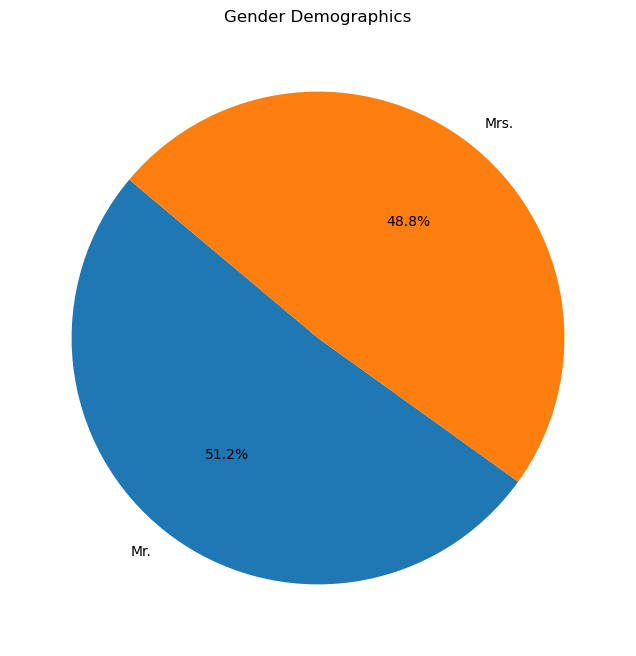

In [46]:
import matplotlib.pyplot as plt

# Counting the frequency of each gender in the DataFrame
gender_counts = sales_data['received_by'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Demographics')
plt.show()

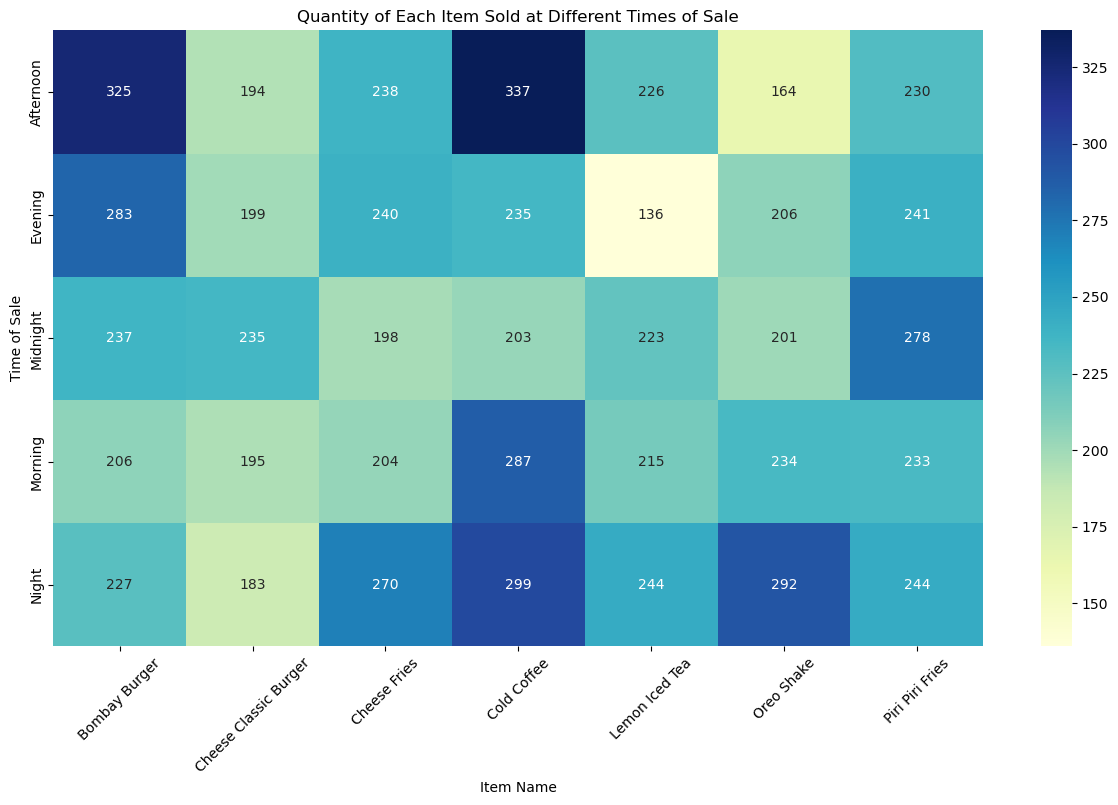

In [47]:
import seaborn as sns

# Grouping data by time of sale and item name, then counting the quantity sold
item_sales_by_time = sales_data.groupby(['time_of_sale', 'item_name']).sum()['quantity'].reset_index()

# Creating a pivot table for the heatmap
pivot_table = item_sales_by_time.pivot(index="time_of_sale", columns="item_name", values="quantity")

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Quantity of Each Item Sold at Different Times of Sale')
plt.xlabel('Item Name')
plt.ylabel('Time of Sale')
plt.xticks(rotation=45)
plt.show()

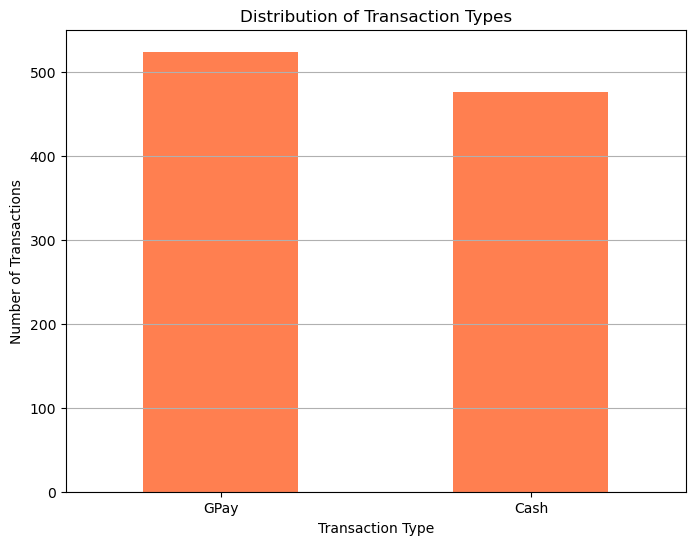

In [48]:
# Plotting the distribution of transaction types
transaction_type_counts = sales_data['transaction_type'].value_counts()

plt.figure(figsize=(8, 6))
transaction_type_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

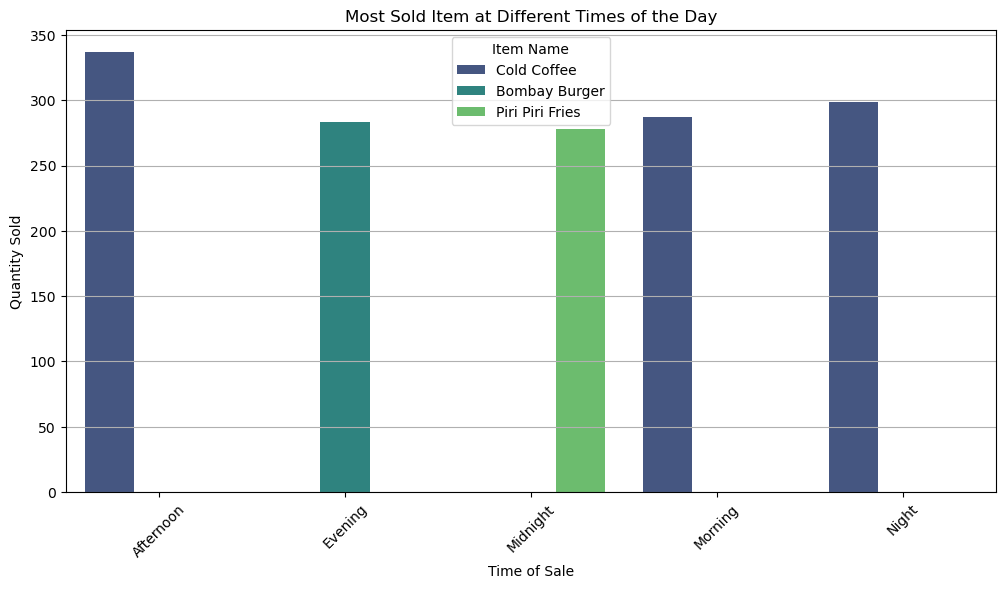

In [49]:
# Grouping data by time of sale and item name, then summing the quantity sold
max_item_sales_by_time = sales_data.groupby(['time_of_sale', 'item_name']).sum()['quantity'].reset_index()

# Finding the item that sells the most at each time of the day
max_items_per_time = max_item_sales_by_time.loc[max_item_sales_by_time.groupby('time_of_sale')['quantity'].idxmax()]

# Plotting the bar chart for the most sold item at different times of the day
plt.figure(figsize=(12, 6))
sns.barplot(x='time_of_sale', y='quantity', hue='item_name', data=max_items_per_time, palette='viridis')
plt.title('Most Sold Item at Different Times of the Day')
plt.xlabel('Time of Sale')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Item Name')
plt.grid(axis='y')
plt.show()

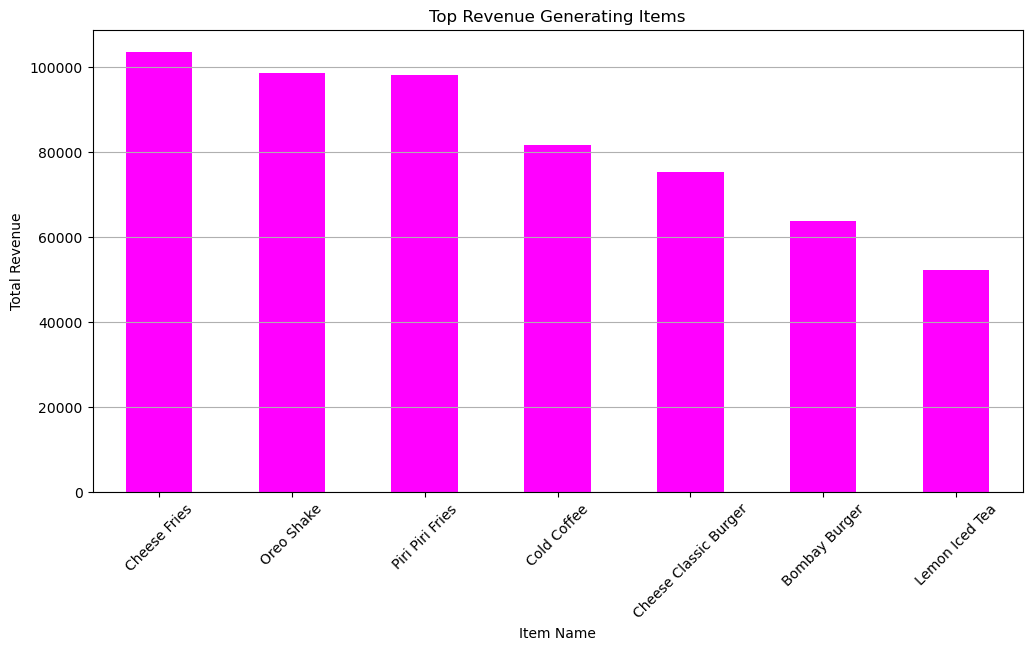

In [51]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'sales_data' with the necessary data.
# Here, we'll group by 'item_name', sum the 'transaction_amount', and sort the values.
top_revenue_items = sales_data.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False)

# Plotting the bar chart for the top revenue generating items
plt.figure(figsize=(12, 6))
top_revenue_items.plot(kind='bar', color='magenta')
plt.title('Top Revenue Generating Items')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/Users/madhumithaganta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/madhumithaganta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/madhumithaganta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


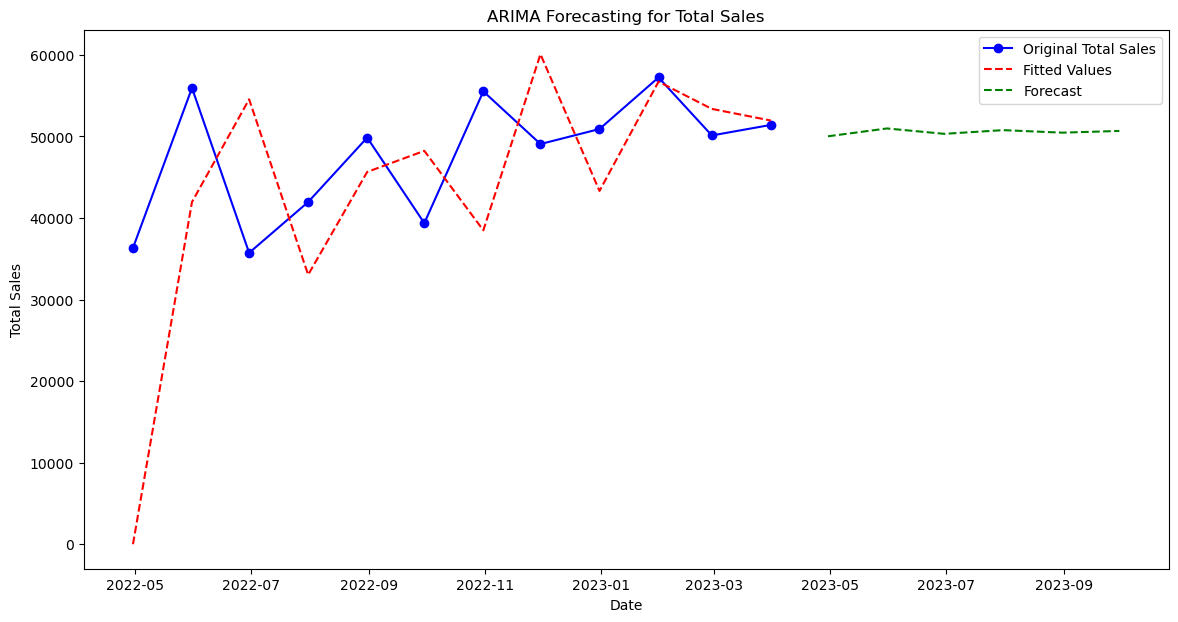

In [53]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
sales_data = pd.read_csv('/Users/madhumithaganta/Downloads/data.csv')

# Function to convert date format
def convert_date_format(date_str):
    try:
        return datetime.strptime(date_str, '%d-%m-%Y').strftime('%m-%d-%Y')
    except ValueError:
        return pd.NaT  # Return Not a Time for invalid dates

# Apply the function to the 'date' column
sales_data['date'] = sales_data['date'].apply(convert_date_format)

# Convert 'date' column to datetime, handling errors
sales_data['date'] = pd.to_datetime(sales_data['date'], errors='coerce')

# Check for NaT values and remove rows with NaT
sales_data = sales_data.dropna(subset=['date'])

# Aggregate sales data by month
sales_data['Month-Year'] = sales_data['date'].dt.to_period('M').dt.to_timestamp('M')
monthly_sales = sales_data.groupby('Month-Year')['transaction_amount'].sum()

# Fit ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 6 months
forecast = model_fit.get_forecast(steps=6)
forecast_index = [monthly_sales.index[-1] + MonthEnd(i) for i in range(1, 7)]
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Original Total Sales', color='blue', marker='o')
plt.plot(monthly_sales.index, model_fit.fittedvalues, label='Fitted Values', color='red', linestyle='--')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green', linestyle='--')
plt.title('ARIMA Forecasting for Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


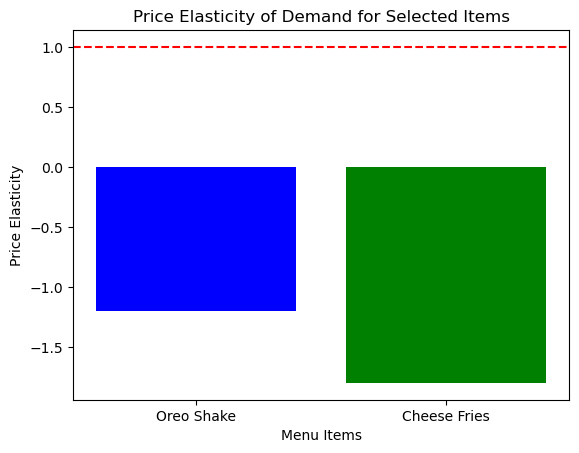

In [54]:
# Hypothetical data
data = {'Oreo Shake': [90, 100, 150, 130], 'Cheese Fries': [120, 110, 100, 115]}
items = list(data.keys())
elasticities = []

# Calculate elasticity
for item, values in data.items():
    original_price, new_price, original_quantity, new_quantity = values
    price_change_percentage = ((new_price - original_price) / original_price) * 100
    quantity_change_percentage = ((new_quantity - original_quantity) / original_quantity) * 100
    elasticity = quantity_change_percentage / price_change_percentage
    elasticities.append(elasticity)

# Plotting
plt.bar(items, elasticities, color=['blue', 'green'])
plt.axhline(y=1, color='red', linestyle='--')
plt.xlabel('Menu Items')
plt.ylabel('Price Elasticity')
plt.title('Price Elasticity of Demand for Selected Items')
plt.show()

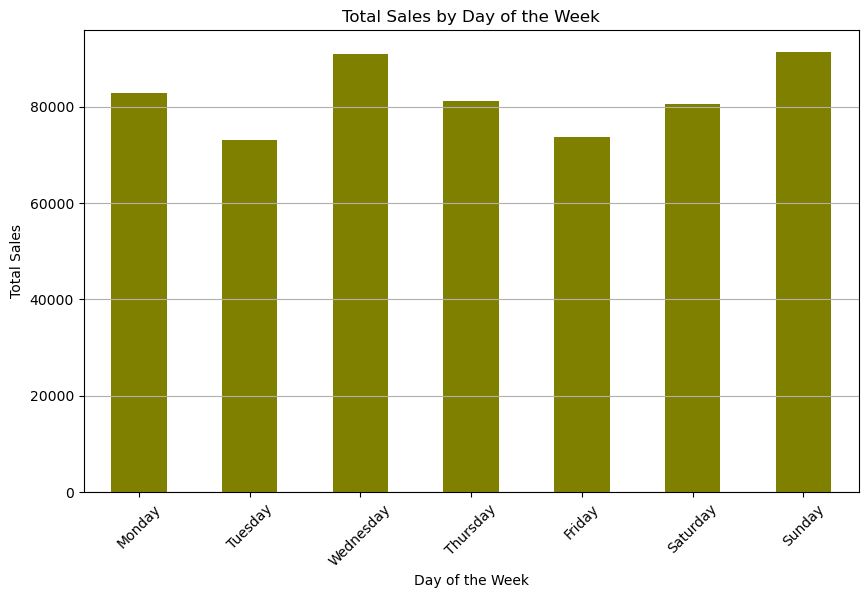

In [55]:
# Convert 'date' column to datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Now you can use the .dt accessor
sales_data['day_of_week'] = sales_data['date'].dt.day_name()


# Adding a column for the day of the week
sales_data['day_of_week'] = sales_data['date'].dt.day_name()

# Grouping the data by day of the week and summing up the transaction amounts
sales_by_day_of_week = sales_data.groupby('day_of_week')['transaction_amount'].sum()

# Reordering the days of the week for the plot
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day_of_week = sales_by_day_of_week.reindex(ordered_days)

# Plotting the bar chart for sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day_of_week.plot(kind='bar', color='olive')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()